In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# membaca data
data = pd.read_excel("CHEESE CLUB 70GR.xlsx")

# membuat array sebagai indeks time series
time_series = np.arange(len(data))

# mengatur array sebagai index
data.set_index(time_series, inplace=True)

# membagi data menjadi data latih dan data uji
train_data = data[:25]
test_data = data[50:]

# melatih model regresi linear
regressor = LinearRegression()
regressor.fit(np.array(train_data.index.values.astype(int)).reshape(-1, 1), train_data["JUMLAH PENJUALAN"])

# membuat prediksi menggunakan data uji
test_data.loc[:, "Prediksi"] = regressor.predict(np.array(test_data.index.values.astype(int)).reshape(-1, 1))

# menghitung MAPE
mape = mean_absolute_percentage_error(test_data["JUMLAH PENJUALAN"], test_data["Prediksi"])
print("MAPE:", mape, "%")
print(test_data)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

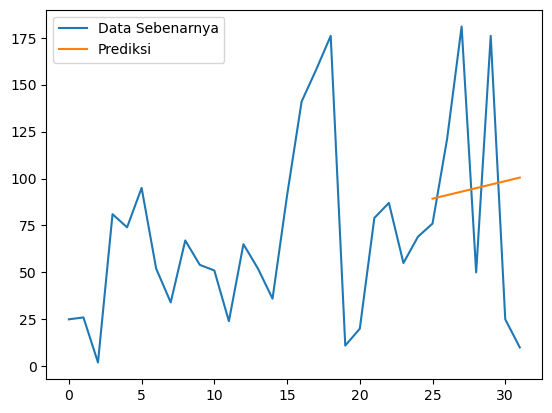

In [15]:
# menampilkan grafik prediksi dan data sebenarnya
plt.plot(data.index, data["JUMLAH PENJUALAN"], label="Data Sebenarnya")
plt.plot(test_data.index, test_data["Prediksi"], label="Prediksi")
plt.legend()
plt.show()
